In [1]:
import clickhouse_driver
import numpy as np
import json
import matplotlib.pyplot as plt


Korben_medal="medalBobKorbenDallas"
Lebwa_medal="medalBobLebwa"
Yusha_medal="medalBobYusha"
Amway_medal="medalBobAmway921"

with open("clickhouse_host.json") as f:
    host = json.loads(f.read())  

client = clickhouse_driver.Client(host=host["ip"],user=host["user"])
select_team="select id,(wins/(wins+losses+draws)) as win_rate,(total_damage/(wins+losses+draws)) as avg_damage, avg_xp from wot.player_stat where wins!=0 and losses!=0 and draws!=0 and bb_team='{}'"

In [2]:
Korben_team_all = client.execute(select_team.format(Korben_medal))
Lebwa_team_all = client.execute(select_team.format(Lebwa_medal))
Yusha_team_all = client.execute(select_team.format(Yusha_medal))
Amway_team_all = client.execute(select_team.format(Amway_medal))
teams_all=[Korben_team_all,Lebwa_team_all,Yusha_team_all,Amway_team_all]

In [3]:
teams = []
for team in teams_all:
    teams.append(np.array([e[1] for e in team]))

for i in range(len(teams)):
    teams[i] = teams[i][~np.isnan(teams[i])]
team_names=["KorbenDallas","Lebwa","Yusha","Amway921"]
team_colors=['pink','purple','blue','green']

In [4]:
def reject_outliers(data, m=3):
    return data[abs(data - np.median(data)) < m * np.std(data)]

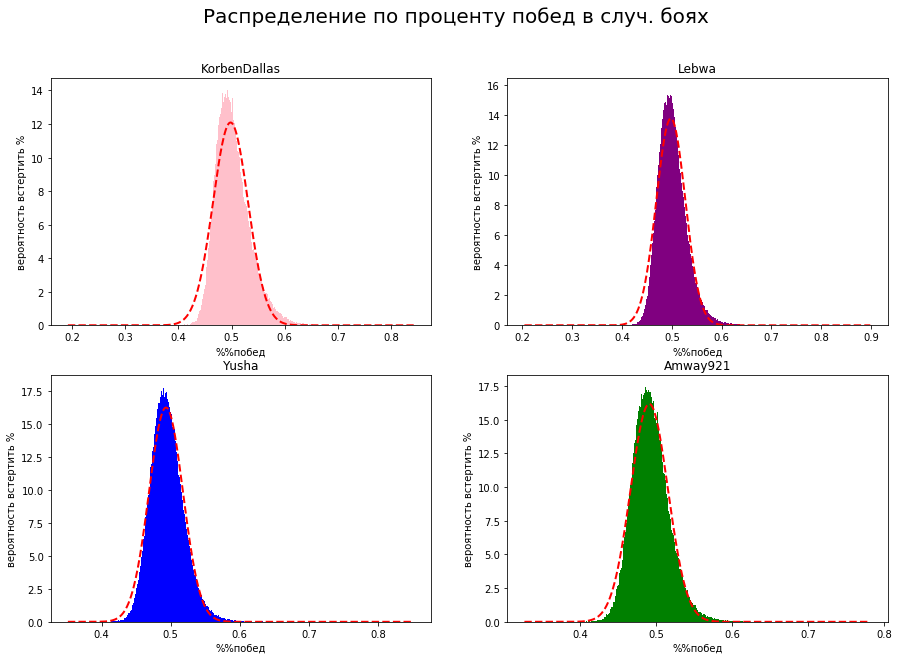

In [5]:
plt.rcParams['figure.figsize'] = 15,10

fig = plt.figure(0)
fig.suptitle("Распределение по проценту побед в случ. боях",fontsize=20)

for t in range(4):
    plt.subplot(2,2,t+1)
    plt.title(team_names[t])
    n,bins,pat=plt.hist([teams[t]],bins="auto",facecolor=team_colors[t],density=True)
    plt.xlabel("%%побед")
    plt.ylabel("вероятность встертить %")
    sigma = np.std(teams[t])
    mu = np.median(teams[t])
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))*
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r',ls='--')



In [6]:
for i in range(len(teams)):
    teams[i] = reject_outliers(teams[i])

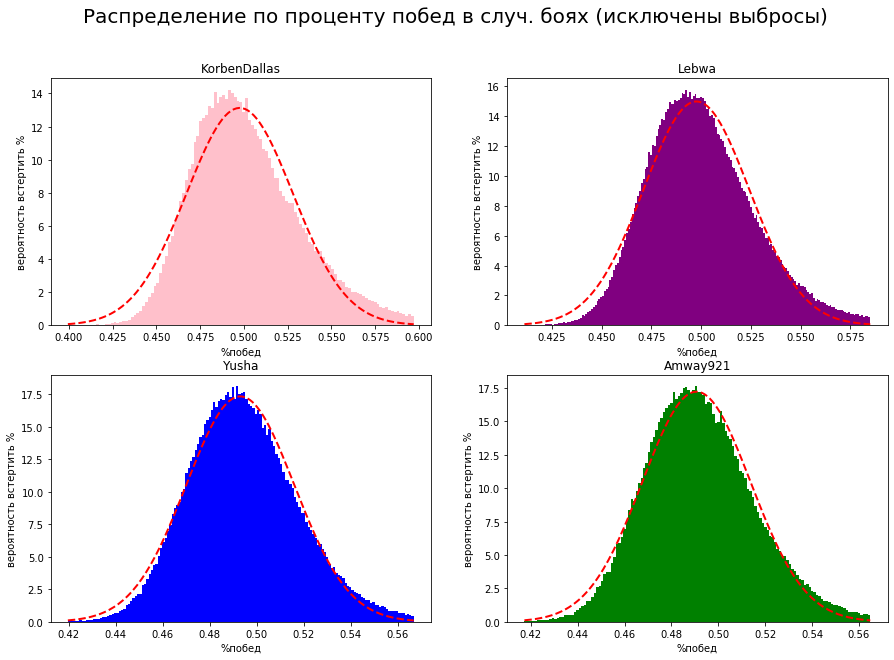

In [7]:

fig = plt.figure(0)
fig.suptitle("Распределение по проценту побед в случ. боях (исключены выбросы)",fontsize=20)

for t in range(4):
    plt.subplot(2,2,t+1)
    plt.title(team_names[t])
    n,bins,pat=plt.hist([teams[t]],bins="auto",facecolor=team_colors[t],density=True)
    sigma = np.std(teams[t])
    mu = np.median(teams[t])
    plt.xlabel("%побед")
    plt.ylabel("вероятность встертить %")
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))*
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r',ls='--')



In [8]:
print("Медиана процента побед:")
for t in range(4):
    print("%s:   %.5f"%(team_names[t],np.median(teams[t])))

print("\n\nКоличество игроков в командах:")
for t in range(4):
    print("%s:   %d"%(team_names[t],teams[t].shape[0]))

Медиана процента побед:
KorbenDallas:   0.49759
Lebwa:   0.49765
Yusha:   0.49305
Amway921:   0.49065


Количество игроков в командах:
KorbenDallas:   120525
Lebwa:   436774
Yusha:   241634
Amway921:   198190


In [9]:
#Распределение по среднему урону в боях
p = 2
teams = []
for team in teams_all:
    teams.append(np.array([e[p] for e in team]))

for i in range(len(teams)):
    teams[i] = teams[i][~np.isnan(teams[i])]

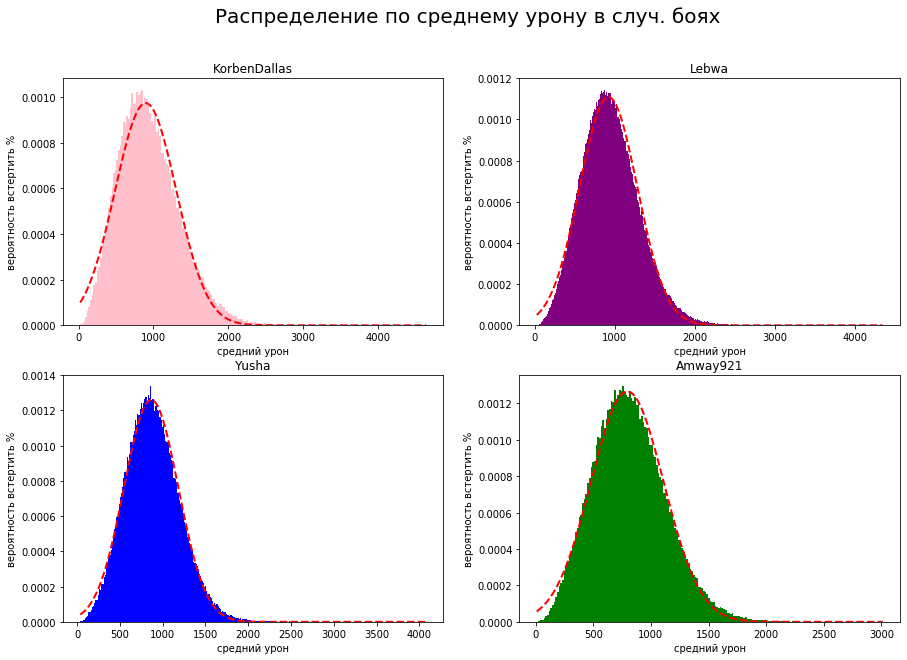

In [10]:
fig = plt.figure(0)
fig.suptitle("Распределение по среднему урону в случ. боях",fontsize=20)
for t in range(4):
    plt.subplot(2,2,t+1)
    plt.title(team_names[t])
    n,bins,pat=plt.hist([teams[t]],bins="auto",facecolor=team_colors[t],density=True)
    plt.xlabel("средний урон")
    plt.ylabel("вероятность встертить %")
    sigma = np.std(teams[t])
    mu = np.median(teams[t])
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))*
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r',ls='--')

In [11]:
#Распределение по среднему опыту в боях
teams = []
for team in teams_all:
    teams.append(np.array([e[p] for e in team]))

for i in range(len(teams)):
    teams[i] = teams[i][~np.isnan(teams[i])]

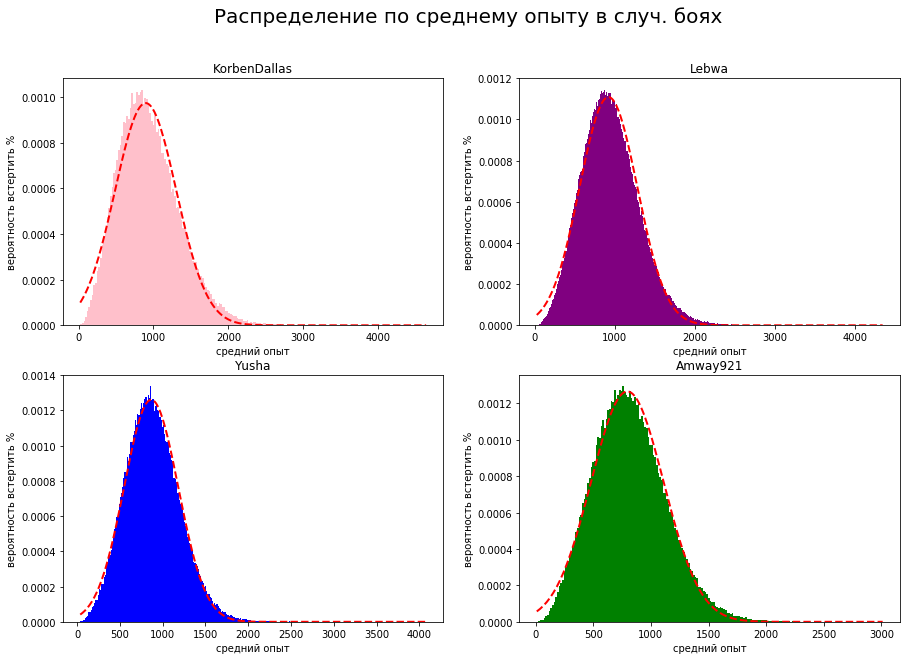

In [12]:
fig = plt.figure(0)
fig.suptitle("Распределение по среднему опыту в случ. боях",fontsize=20)
for t in range(4):
    plt.subplot(2,2,t+1)
    plt.title(team_names[t])
    n,bins,pat=plt.hist([teams[t]],bins="auto",facecolor=team_colors[t],density=True)
    sigma = np.std(teams[t])
    mu = np.median(teams[t])
    plt.xlabel("средний опыт")
    plt.ylabel("вероятность встертить %")
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))*
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r',ls='--')

In [13]:
#количестов игроков за каждую команду


In [14]:
#ВСЕ ИГРОКИ
select_all="select id,(wins/(wins+losses+draws)) as win_rate,(total_damage/(wins+losses+draws)) as avg_damage, avg_xp from wot.player_stat where wins!=0 and losses!=0 and draws!=0"

In [15]:
all_players = client.execute(select_all)
all_stat = []
param_name=["% побед","Урон","Опыт"]
for i in range(3):
    all_stat.append(np.array([e[i+1] for e in all_players]))
for i in range(3):    
    all_stat[i] = all_stat[i][~np.isnan(all_stat[i])]


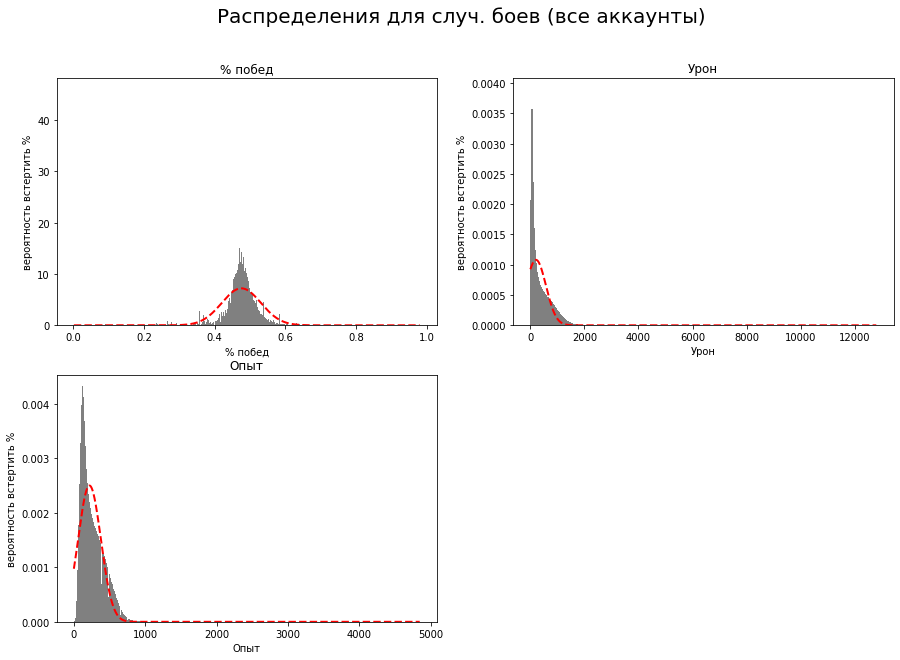

In [16]:
fig = plt.figure(0)
fig.suptitle("Распределения для случ. боев (все аккаунты)",fontsize=20)
for t in range(3):
    plt.subplot(2,2,t+1)
    plt.title(param_name[t])
    n,bins,pat=plt.hist(all_stat[t],bins="auto",facecolor='gray',density=True)
    sigma = np.std(all_stat[t])
    mu = np.median(all_stat[t])
    plt.xlabel(param_name[t])
    plt.ylabel("вероятность встертить %")
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))*
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r',ls='--')

In [17]:
for i in range(len(all_stat)):
    all_stat[i] = reject_outliers(all_stat[i])

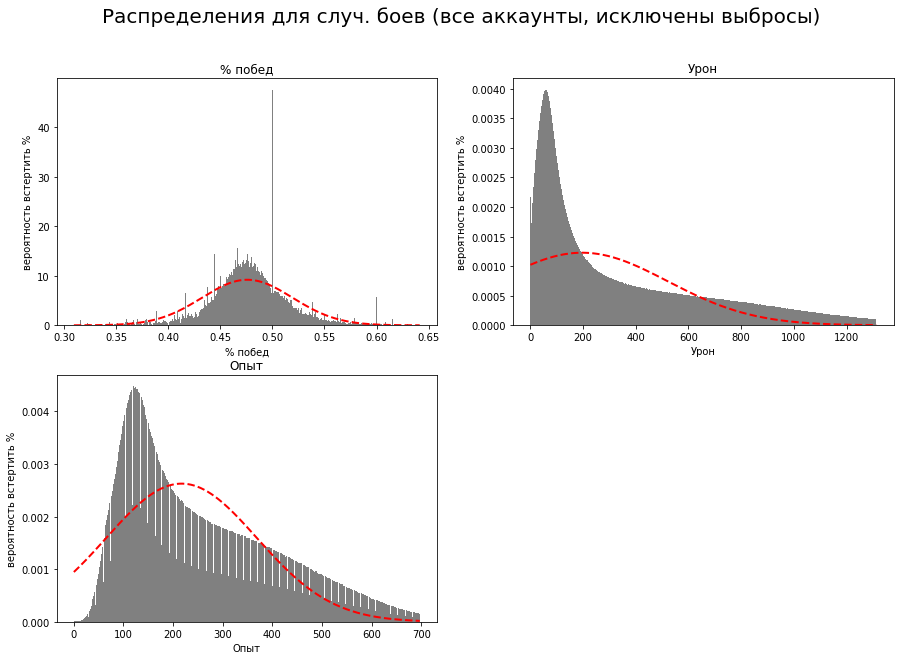

In [18]:
fig = plt.figure(0)
fig.suptitle("Распределения для случ. боев (все аккаунты, исключены выбросы)",fontsize=20)
for t in range(3):
    plt.subplot(2,2,t+1)
    plt.title(param_name[t])
    n,bins,pat=plt.hist(all_stat[t],bins="auto",facecolor='gray',density=True)
    sigma = np.std(all_stat[t])
    mu = np.median(all_stat[t])
    plt.xlabel(param_name[t])
    plt.ylabel("вероятность встертить %")
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))*
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r',ls='--')

In [19]:
#Количество обработанных аккаунтов
print("Количество обработанных аккаунтов: %d \n",all_stat[0].shape[0])

Количество обработанных аккаунтов: %d 
 14134514


In [20]:
all_stat[0].shape

(14134514,)

In [21]:
len(all_players)

14455640